In [168]:
# global imports

# Import Python extension library (mathematical function library)
import numpy as np

# Import Python data analysis tools
import pandas as pd

# Import Python data visualization library
import seaborn as sns

# Import matplotlib-based plotting tools
import matplotlib.pyplot as plt

# Import warning filter
import warnings

# Set the warning state to 'ignore'
warnings.filterwarnings("ignore")

# Import Python data calculation tool
import statistics

# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# KNN
from sklearn.neighbors import KNeighborsClassifier

# naive bayes
from sklearn.naive_bayes import GaussianNB

#decision tree
from sklearn.tree import DecisionTreeClassifier

# Confusing matrix and multiple confusing matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

# Precision function
from sklearn.metrics import precision_score

# Recall function
from sklearn.metrics import recall_score

# F1 function
from sklearn.metrics import f1_score

# PR Curve
from sklearn.metrics import precision_recall_curve

# AP function Calculate AP value (area under PR Curve)
from sklearn.metrics import average_precision_score

# ROC Curve
from sklearn.metrics import roc_curve

# AUC function Calculate AUC value (area under ROC Curve)
from sklearn.metrics import auc

# Feature scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Cut Dataset
from sklearn.model_selection import train_test_split

# Evaluation indicator: logloss
from sklearn.metrics import log_loss 

In [5]:
# read dataset

# Create a dataframe for the dataset and import the data
df_origin = pd.read_csv("../dataset/heartattack-dataset.csv")

# View the first five rows of the dataset
df_origin.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exng,oldpeak,slp,ca,thal,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Classify the features in the database
categorical_cols = ['sex','cp','fbs','restecg','exng','slp','ca','thal']
numerical_cols = ["age","trtbps","chol","thalach","oldpeak"]
target_col = ["output"]
print("The categorial columns (discontinuous data) are : ", categorical_cols)
print("The numerical columns (continuous data) are  : ", numerical_cols)
print("The  target  variable  is  : ", target_col)

The categorial columns (discontinuous data) are :  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'ca', 'thal']
The numerical columns (continuous data) are  :  ['age', 'trtbps', 'chol', 'thalach', 'oldpeak']
The  target  variable  is  :  ['output']


In [8]:
# Features after classification

# Discontinuous data
# df_origin[categorical_cols].head(3)

# Continuous data
df_origin[numerical_cols].head(3)

,age,trtbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4


In [10]:
# Feature scaling

# In order to eliminate the effects of unit and scale differences between features, 
#to treat each dimension feature equally, features need to be normalized.

# Create backup df1 of df_origin
df1 = df_origin

df1.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exng,oldpeak,slp,ca,thal,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [11]:
# define the columns to be encoded and scaled done before
#cat_cols = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
#con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# Use get_dummies for feature extraction to extract the features in cat_cols
# Generate dummy variable
# For categorical_ Cols performs dummy variable processing, and
# drop the first column in the generated dummy variable is rounded off to avoid causing multicollinearity

# Dataset after generating dummy variable= continuous variable + discontinuous variable
# Continuous variables should be scaled to the same data dimension
# Discontinuous variables should generate dummy variables

df2 = pd.get_dummies(df1, columns = categorical_cols, drop_first = True)

df2.head(3)

,age,trtbps,chol,thalach,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exng_1,slp_1,slp_2,ca_1,ca_2,ca_3,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [12]:
# The results are removed from the dataset and results are used to compare the accuracy of the algorithm
# Split dataset into independent variable set X and dependent variable set Y

# Generate independent variable set X  (features variables)
X = df2.drop(['output'],axis=1)

X.head(3)

,age,trtbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,ca_1,ca_2,ca_3,thal_2,thal_3
0,63,145,233,150,2.3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [13]:
# Conduct feature normalization (unify data of each feature to the same dimension)

X[numerical_cols].head(3)

,age,trtbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4


In [14]:
# Generate dependent variable set Y  (output variable)
# set Y does not need to be normalized, it is already the same dimension

y = df2[['output']]

y.head(3)

,output
0,1
1,1
2,1


In [16]:
# The method of feature normalization is to use scaling

# instantiating the scaler


# Method I
# scaler = RobustScaler()

# Method II
#scaler = MinMaxScaler()

# Method III
scaler = StandardScaler()

# scaling the continuous feature

# Method Parameter Description
# fit: 
# The mean and variance are obtained from the dataset, and a Scalar object is returned

# transform:
# Normalize the training dataset and test dataset;

X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

X[numerical_cols].head(3)

,age,trtbps,chol,thalach,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912


In [18]:
# Divide the dataset into training set and test set
# The splitting ratio of the dataset is 8:2

# Parameter explanation:
# train_data：Sample feature set to be divided
# train_target：Sample result set to be divided
# test_size：Sample proportion. If it is an integer, it is the number of samples

# random_state：Seed of random number

# random_state Value Description
# 0: Obtain random numbers with different values each time
# 1: Obtain the random number with the same value each time
# Others: Get random numbers with different values each time? E.g. 42 21
# Leave blank: obtain random numbers with different values each time

# Different values of parameters will lead to different results
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 21)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 43)
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 20)
The shape of X_test is        (61, 20)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


In [20]:
# Divided data set
X_train.head(3)
# X_test.head(3)
# y_train.head(3)
# y_test.head(3)

,age,trtbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,ca_1,ca_2,ca_3,thal_2,thal_3
132,-1.363869,-0.663867,0.941846,0.540209,-0.896862,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0
202,0.400752,1.049520,0.458709,-1.690047,-0.206705,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
196,-0.922713,1.049520,-0.294985,-0.115749,2.208842,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [22]:
# analysis y_test

# unique：The returned array is sorted
print('np.unique(y_test)\n',np.unique(y_test)) 

# Count 0/1 occurrences
for i in np.unique(y_test):
 print(np.sum(y_test==i))

# 0：29/61 
# 1：32/61

np.unique(y_test)
 [0 1]
output    29
dtype: int64
output    32
dtype: int64


## Algorithm I  -- Logistic Regression

### 1. Accuracy

In [60]:
# 1 - Logistic Regression

# Instantiating the object
# Generate Logistic Regression Filters
lr = LogisticRegression()

# Fitting the object
lr.fit(X_train, y_train)

# Calculating the probabilities
y_pred_proba_lr = lr.predict_proba(X_test)

# Finding the predicted valued
y_pred_lr = np.argmax(y_pred_proba_lr,axis=1)

# normalize：
# True(default), which returns the proportion of correct classification
# False, return the number of correctly classified samples

# accuracy= Number of correctly classified samples (acc_number) / Total number of samples(61)
acc_lr = accuracy_score(y_test, y_pred_lr)

# Output the number of correctly predicted samples
# normalize=False: Predict the correct number of samples
# normalize=True: Probability of correct prediction 
acc_number_lr = accuracy_score(y_test, y_pred_lr, normalize=False)
#acc_number_lr = accuracy_score(y_test, y_pred_lr, normalize=True)

# printing the test accuracy
print("The test accuracy score of  Logistric Regression is ", acc_lr)

# printing the number of correctly classified samples
print("The number of correctly classified samples is ", acc_number_lr)

The test accuracy score of  Logistric Regression is  0.9016393442622951
The number of correctly classified samples is  55


In [29]:
# confusion matrix

# Matrix interpretation:
# The total number of test samples is 61
##The sum of the data on the positive diagonal equals to the correctly classified sample
#The sum of the data on the negative diagonal equals to the sample with wrong prediction

cm_lr_1 = confusion_matrix(y_test, y_pred_lr)
cm_lr_1

array([[27,  2],
       [ 4, 28]], dtype=int64)

In [30]:
# Multiple confusion matrix

# The second matrix is equal to the confusion matrix
cm_lr_2 = multilabel_confusion_matrix(y_test, y_pred_lr)
cm_lr_2

array([[[28,  4],
        [ 2, 27]],

       [[27,  2],
        [ 4, 28]]], dtype=int64)

### 2. Precision, Recall, F1

In [170]:
# Calculate precision, recall, f1

# Precision
precision_score_lr_weighted = precision_score(y_test, y_pred_lr, average='weighted')

# Recall
recall_score_lr_weighted = recall_score(y_test, y_pred_lr, average='weighted')

# F1
f1_score_lr_weighted = f1_score(y_test, y_pred_lr, average='weighted')

print("The precision of logistic regression is ", precision_score(y_test, y_pred_lr, average='weighted'))
# print("The precision of logistic regression is ", precision_score_lr_weighted)
print("==========================")
print("The recall of logistic regression is ", recall_score(y_test, y_pred_lr, average='weighted'))
# print("The recall of logistic regression is ", recall_score_lr_weighted)
print("==========================")
print("The f1 of logistic regression is ", f1_score(y_test, y_pred_lr, average='weighted'))
# print("The f1 of logistic regression is ", f1_score_lr_weighted)

The precision of logistic regression is  0.9036841177507492
The recall of logistic regression is  0.9016393442622951
The f1 of logistic regression is  0.9016922263352722


In [33]:
# logistic regression modeling process
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_proba_lr = lr.predict_proba(X_test)

# Predicted results
y_pred_lr = np.argmax(y_pred_proba_lr,axis=1)
y_pred_lr

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [40]:
# Calculate scores 
# Used to generate predicted results distribution

# 1. predict_proba: 
# Probability of prediction input samples belonging to each category
# Probability sum is 1

scores_lr_1 = lr.predict_proba(X_test)
# scores_lr_1 = lr.predict_proba(X_test)[:,1]
scores_lr_1

# 2. predict:
# The prediction result with high output probability

# scores_lr_2 = lr.predict(X_test)
# scores_lr_2 = lr.predict(X_test)[:,1]
# scores_lr_2

array([[0.97648128, 0.02351872],
       [0.53306119, 0.46693881],
       [0.35084894, 0.64915106],
       [0.97677912, 0.02322088],
       [0.06736384, 0.93263616],
       [0.07824614, 0.92175386],
       [0.35179804, 0.64820196],
       [0.99454676, 0.00545324],
       [0.98758655, 0.01241345],
       [0.42552968, 0.57447032],
       [0.47085575, 0.52914425],
       [0.8954639 , 0.1045361 ],
       [0.07579818, 0.92420182],
       [0.94804642, 0.05195358],
       [0.01478362, 0.98521638],
       [0.0486547 , 0.9513453 ],
       [0.02156507, 0.97843493],
       [0.95928012, 0.04071988],
       [0.99256059, 0.00743941],
       [0.98612054, 0.01387946],
       [0.56087972, 0.43912028],
       [0.92970746, 0.07029254],
       [0.64769459, 0.35230541],
       [0.24408553, 0.75591447],
       [0.17248489, 0.82751511],
       [0.36672646, 0.63327354],
       [0.12799731, 0.87200269],
       [0.29024373, 0.70975627],
       [0.94381943, 0.05618057],
       [0.04829158, 0.95170842],
       [0.

In [43]:
# Take the second column of the above matrix (the predicted value is 1)
scores_lr_1_1 = lr.predict_proba(X_test)[:,1]
# scores_lr_1_1 = scores_lr_1[:,1]
scores_lr_1_1

array([0.02351872, 0.46693881, 0.64915106, 0.02322088, 0.93263616,
       0.92175386, 0.64820196, 0.00545324, 0.01241345, 0.57447032,
       0.52914425, 0.1045361 , 0.92420182, 0.05195358, 0.98521638,
       0.9513453 , 0.97843493, 0.04071988, 0.00743941, 0.01387946,
       0.43912028, 0.07029254, 0.35230541, 0.75591447, 0.82751511,
       0.63327354, 0.87200269, 0.70975627, 0.05618057, 0.95170842,
       0.02437443, 0.02658924, 0.00919732, 0.16820219, 0.83689023,
       0.03751375, 0.74695913, 0.87773467, 0.62376051, 0.88897951,
       0.92699675, 0.8301018 , 0.90465742, 0.71941297, 0.80216151,
       0.08273072, 0.37514961, 0.96050798, 0.03525413, 0.01205127,
       0.09033716, 0.05443552, 0.63386224, 0.95593516, 0.20075271,
       0.02558864, 0.19024589, 0.96709863, 0.01870597, 0.00458341,
       0.05301163])

### 3. PR curve and AP value

ap_lr:
0.9505328058301409


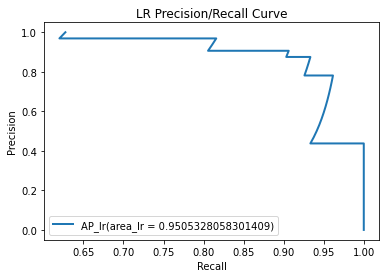

recalls_lr:
[1.      0.96875 0.96875 0.96875 0.96875 0.96875 0.96875 0.96875 0.96875
 0.96875 0.96875 0.96875 0.96875 0.96875 0.9375  0.90625 0.90625 0.90625
 0.90625 0.90625 0.875   0.875   0.84375 0.8125  0.78125 0.78125 0.75
 0.71875 0.6875  0.65625 0.625   0.59375 0.5625  0.53125 0.5     0.46875
 0.4375  0.4375  0.40625 0.375   0.34375 0.3125  0.28125 0.25    0.21875
 0.1875  0.15625 0.125   0.09375 0.0625  0.03125 0.     ]
52
precisions_lr:
[0.62745098 0.62       0.63265306 0.64583333 0.65957447 0.67391304
 0.68888889 0.70454545 0.72093023 0.73809524 0.75609756 0.775
 0.79487179 0.81578947 0.81081081 0.80555556 0.82857143 0.85294118
 0.87878788 0.90625    0.90322581 0.93333333 0.93103448 0.92857143
 0.92592593 0.96153846 0.96       0.95833333 0.95652174 0.95454545
 0.95238095 0.95       0.94736842 0.94444444 0.94117647 0.9375
 0.93333333 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.   

In [55]:
# Draw PR curve and calculate AP value

# Generate Data

# 1. Manually generate thresholds
# thresholds = np.arange(np.min(probs), np.max(probs), 0.1)

# 2. Generate thresholds using encapsulated methods
precisions_lr, recalls_lr, thresholds_lr_pr = precision_recall_curve(y_test, scores_lr_1_1)
#precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Draw chart

# plt.figure("LR_P-R Curve")

# Set the title of the chart
plt.title('LR Precision/Recall Curve')

# Set the label of the axis
plt.xlabel('Recall')
plt.ylabel('Precision')

# Calculate AP value
ap_lr = average_precision_score(y_test, scores_lr_1_1, average='weighted', sample_weight=None)
print("ap_lr:")
print(ap_lr) # Area Under Curve
print("==============")

# Display data
plt.plot(precisions_lr, recalls_lr, label='AP_lr(area_lr = {0:.16f})'.format(ap_lr), lw=2) #lw = lineweighth

# Display legend
plt.legend(loc="lower left")

# Display chart
plt.show()

# Generate 51 thresholds
# Generate 52 recall-precision pairs according to thresholds
# Draw the curve according to recalls-precisions pairs
print("recalls_lr:")
print(recalls_lr)
print(len(recalls_lr))
print("==============")

print("precisions_lr:")
print(precisions_lr)
print(len(precisions_lr))
print("==============")

print("thresholds_lr_pr:")
print(thresholds_lr_pr)
print(len(thresholds_lr_pr))

### 4. ROC curve and AUC value

roc_auc_lr:
0.9428879310344827


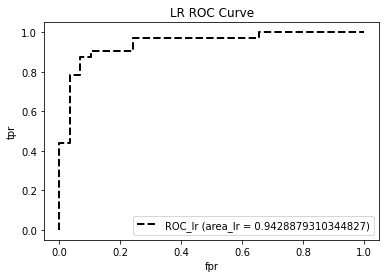

fpr_lr:
[0.         0.         0.         0.03448276 0.03448276 0.06896552
 0.06896552 0.10344828 0.10344828 0.24137931 0.24137931 0.65517241
 0.65517241 1.        ]
14
tpr_lr:
[0.      0.03125 0.4375  0.4375  0.78125 0.78125 0.875   0.875   0.90625
 0.90625 0.96875 0.96875 1.      1.     ]
14
thresholds_lr_roc:
[1.98521638 0.98521638 0.87773467 0.87200269 0.63386224 0.63327354
 0.52914425 0.46693881 0.43912028 0.19024589 0.1045361  0.02558864
 0.02437443 0.00458341]
14


In [56]:
# Draw ROC curve and calculate AUC value

# Generate thresholds using encapsulated methods
fpr_lr, tpr_lr, thresholds_lr_roc = roc_curve(y_test, scores_lr_1_1)
#precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Draw chart

# plt.figure("LR_ROC Curve")

# Set the title of the chart
plt.title('LR ROC Curve')

# Set the label of the axis
plt.xlabel('fpr')
plt.ylabel('tpr')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")

# Calculate AUC value
roc_auc_lr = auc(fpr_lr, tpr_lr)
print("roc_auc_lr:")
print(roc_auc_lr) # Area Under Curve
print("==============")

# Display data
plt.plot(fpr_lr, tpr_lr, 'k--', label='ROC_lr (area_lr = {0:.16f})'.format(roc_auc_lr), lw=2) #lw =2 linewidth

# Display legend
plt.legend(loc="lower right")

# Display chart
plt.show()

# Generate 14 thresholds
# Generate 14 fpr-tpr pairs according to thresholds
# Draw the curve according to fpr-tpr pairs
print("fpr_lr:")
print(fpr_lr)
print(len(fpr_lr))
print("==============")

print("tpr_lr:")
print(tpr_lr)
print(len(tpr_lr))
print("==============")

print("thresholds_lr_roc:")
print(thresholds_lr_roc)
print(len(thresholds_lr_roc))

## Algorithm II  -- SVM

### 1. Accuracy

In [59]:
# 2 - Support Vector Machines

# instantiating the object and fitting

# probability=True: enable fitting probability
clf = SVC(kernel='rbf', C=1, random_state=50, probability=True).fit(X_train,y_train)

# probability=False: Do not use fitting probability
#clf = SVC(kernel='rbf', C=1, random_state=50).fit(X_train,y_train)

# predicting the values
y_pred_svm = clf.predict(X_test)

# accuracy= Number of correctly classified samples (acc_number) / Total number of samples(61)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Output the number of correctly predicted samples
# normalize=False: Predict the correct number of samples
acc_number_svm = accuracy_score(y_test, y_pred_svm, normalize=False)

# printing the test accuracy
print("The test accuracy score of SVM is ", acc_svm)

# printing the number of correctly classified samples
print("The test accuracy score of SVM is ", acc_number_svm)

The test accuracy score of SVM is  0.8852459016393442
The test accuracy score of SVM is  54


In [49]:
# confusion matrix

cm_svm_1 = confusion_matrix(y_test, y_pred_svm)
cm_svm_1

array([[27,  2],
       [ 5, 27]], dtype=int64)

In [50]:
# Multiple confusion matrix

cm_svm_2 = multilabel_confusion_matrix(y_test, y_pred_svm)
cm_svm_2

array([[[27,  5],
        [ 2, 27]],

       [[27,  2],
        [ 5, 27]]], dtype=int64)

### 2. Precision, Recall, F1

In [51]:
# Calculate precision, recall, f1

# Precision
precision_score_svm_weighted = precision_score(y_test, y_pred_svm, average='weighted')

# Recall
recall_score_svm_weighted = recall_score(y_test, y_pred_svm, average='weighted')

# F1
f1_score_svm_weighted = f1_score(y_test, y_pred_svm, average='weighted')

print("The precision of SVM is ", precision_score(y_test, y_pred_svm, average='weighted'))
# print("The precision of SVM is ", precision_score_svm_weighted)
print("==========================")
print("The recall of SVM is ", recall_score(y_test, y_pred_svm, average='weighted'))
#print("The recall of SVM is ", recall_score_svm_weighted)
print("==========================")
print("The f1 of SVM is ", f1_score(y_test, y_pred_svm, average='weighted'))
#print("The f1 of SVM is ", f1_score_svm_weighted)

The precision of SVM is  0.8895385811192763
The recall of SVM is  0.8852459016393442
The f1 of SVM is  0.8852459016393444


In [52]:
# Calculate scores

# Probability of prediction input samples belonging to each category
# Probability sum is 1
scores_svm_1 = clf.predict_proba(X_test)
scores_svm_1

array([[0.95581989, 0.04418011],
       [0.62269654, 0.37730346],
       [0.4580822 , 0.5419178 ],
       [0.69973058, 0.30026942],
       [0.15657004, 0.84342996],
       [0.16848459, 0.83151541],
       [0.17426567, 0.82573433],
       [0.76325795, 0.23674205],
       [0.94518883, 0.05481117],
       [0.37660174, 0.62339826],
       [0.44832513, 0.55167487],
       [0.78594374, 0.21405626],
       [0.12204034, 0.87795966],
       [0.85562691, 0.14437309],
       [0.0451956 , 0.9548044 ],
       [0.05916553, 0.94083447],
       [0.07143069, 0.92856931],
       [0.92259068, 0.07740932],
       [0.97412038, 0.02587962],
       [0.90655031, 0.09344969],
       [0.655901  , 0.344099  ],
       [0.93960929, 0.06039071],
       [0.66325777, 0.33674223],
       [0.21546052, 0.78453948],
       [0.22053853, 0.77946147],
       [0.29986707, 0.70013293],
       [0.18298161, 0.81701839],
       [0.18019602, 0.81980398],
       [0.90416889, 0.09583111],
       [0.07513215, 0.92486785],
       [0.

In [53]:
# Take the second column of the above matrix (the predicted value is 1)
scores_svm_1_1 = clf.predict_proba(X_test)[:,1]
# scores_svm_1_1 = scores_svm_1[:,1]
scores_svm_1_1

array([0.04418011, 0.37730346, 0.5419178 , 0.30026942, 0.84342996,
       0.83151541, 0.82573433, 0.23674205, 0.05481117, 0.62339826,
       0.55167487, 0.21405626, 0.87795966, 0.14437309, 0.9548044 ,
       0.94083447, 0.92856931, 0.07740932, 0.02587962, 0.09344969,
       0.344099  , 0.06039071, 0.33674223, 0.78453948, 0.77946147,
       0.70013293, 0.81701839, 0.81980398, 0.09583111, 0.92486785,
       0.05771808, 0.08706272, 0.05166067, 0.27300413, 0.47340745,
       0.06118444, 0.5522225 , 0.84713845, 0.52046663, 0.83154108,
       0.92401974, 0.84485091, 0.918047  , 0.70030377, 0.72759943,
       0.21207809, 0.41303713, 0.94229215, 0.10244389, 0.03490812,
       0.19208191, 0.14662556, 0.51874472, 0.85381041, 0.26476973,
       0.2575164 , 0.19642191, 0.9414055 , 0.07298319, 0.01299212,
       0.03482349])

### 3. PR curve and AP value

ap_svm:
0.9488317935320545


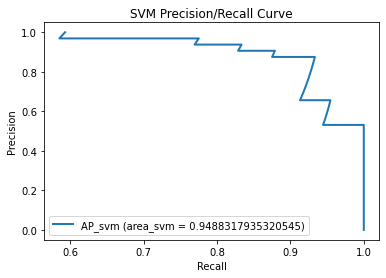

recalls_svm:
[1.      0.96875 0.96875 0.96875 0.96875 0.96875 0.96875 0.96875 0.96875
 0.96875 0.96875 0.96875 0.96875 0.96875 0.96875 0.9375  0.9375  0.9375
 0.9375  0.90625 0.90625 0.90625 0.875   0.875   0.875   0.84375 0.8125
 0.78125 0.75    0.71875 0.6875  0.65625 0.65625 0.625   0.59375 0.5625
 0.53125 0.53125 0.5     0.46875 0.4375  0.40625 0.375   0.34375 0.3125
 0.28125 0.25    0.21875 0.1875  0.15625 0.125   0.09375 0.0625  0.03125
 0.     ]
55
precisions_svm:
[0.59259259 0.58490566 0.59615385 0.60784314 0.62       0.63265306
 0.64583333 0.65957447 0.67391304 0.68888889 0.70454545 0.72093023
 0.73809524 0.75609756 0.775      0.76923077 0.78947368 0.81081081
 0.83333333 0.82857143 0.85294118 0.87878788 0.875      0.90322581
 0.93333333 0.93103448 0.92857143 0.92592593 0.92307692 0.92
 0.91666667 0.91304348 0.95454545 0.95238095 0.95       0.94736842
 0.94444444 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.       

In [57]:
# Draw PR curve and calculate AP value

# Generate Data

# Generate thresholds using encapsulated methods
precisions_svm, recalls_svm, thresholds_svm_pr = precision_recall_curve(y_test, scores_svm_1_1)
#precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Draw chart

# plt.figure("SVM_P-R Curve")

# Set the title of the chart
plt.title('SVM Precision/Recall Curve')

# Set the label of the axis
plt.xlabel('Recall')
plt.ylabel('Precision')

# Calculate AP value
ap_svm = average_precision_score(y_test, scores_svm_1_1, average='weighted', sample_weight=None)
print("ap_svm:")
print(ap_svm) # Area Under Curve
print("==============")

# Display data
plt.plot(precisions_svm, recalls_svm, label='AP_svm (area_svm = {0:.16f})'.format(ap_svm), lw=2)

# Display legend
plt.legend(loc="lower left")

# Display chart
plt.show()

# Generate 54 thresholds
# Generate 55 recall-precision pairs according to thresholds
# Draw the curve according to recalls-precisions pairs
print("recalls_svm:")
print(recalls_svm)
print(len(recalls_svm))
print("==============")

print("precisions_svm:")
print(precisions_svm)
print(len(precisions_svm))
print("==============")

print("thresholds_svm_pr:")
print(thresholds_svm_pr)
print(len(thresholds_svm_pr))

### 4. ROC curve and AUC value

roc_auc_svm:
0.9364224137931034


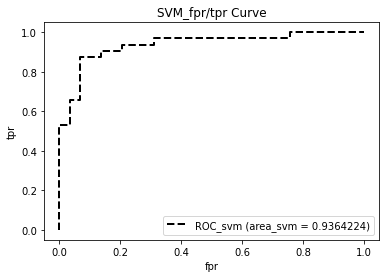

fpr_svm:
[0.         0.         0.         0.03448276 0.03448276 0.06896552
 0.06896552 0.13793103 0.13793103 0.20689655 0.20689655 0.31034483
 0.31034483 0.75862069 0.75862069 1.        ]
16
tpr_svm:
[0.      0.03125 0.53125 0.53125 0.65625 0.65625 0.875   0.875   0.90625
 0.90625 0.9375  0.9375  0.96875 0.96875 1.      1.     ]
16
thresholds_svm_roc:
[1.9548044  0.9548044  0.81980398 0.81701839 0.70030377 0.70013293
 0.47340745 0.37730346 0.344099   0.30026942 0.27300413 0.23674205
 0.21405626 0.06039071 0.05771808 0.01299212]
16


In [58]:
# Draw ROC curve and calculate AUC value

# Generate thresholds using encapsulated methods
fpr_svm, tpr_svm, thresholds_svm_roc = roc_curve(y_test, scores_svm_1_1)
#precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Draw chart

# plt.figure("SVM_ROC Curve")

# Set the title of the chart
plt.title('SVM_fpr/tpr Curve')

# Set the label of the axis
plt.xlabel('fpr')
plt.ylabel('tpr')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")

# Calculate AUC value
roc_auc_svm = auc(fpr_svm, tpr_svm)
print("roc_auc_svm:")
print(roc_auc_svm) # Area Under Curve
print("==============")

# Display data
plt.plot(fpr_svm, tpr_svm, 'k--', label='ROC_svm (area_svm = {0:.7f})'.format(roc_auc_svm), lw=2) #lw =2 linewidth

# Display legend
plt.legend(loc="lower right")

# Display chart
plt.show()

# Generate 16 thresholds
# Generate 16 fpr-tpr pairs according to thresholds
# Draw the curve according to fpr-tpr pairs
print("fpr_svm:")
print(fpr_svm)
print(len(fpr_svm))
print("==============")

print("tpr_svm:")
print(tpr_svm)
print(len(tpr_svm))
print("==============")

print("thresholds_svm_roc:")
print(thresholds_svm_roc)
print(len(thresholds_svm_roc))

## Algorithm III  -- KNN

### 1. Accuracy

In [61]:
# 1 - KNN

# Instantiating the object
# Generate KNN Filters
knn = KNeighborsClassifier()

# Fitting the object
knn.fit(X_train, y_train)

# Calculating the probabilities
y_pred_knn = knn.predict(X_test)

# accuracy= Number of correctly classified samples (acc_number) / Total number of samples(61)
acc_knn = accuracy_score(y_test, y_pred_knn)

# Output the number of correctly predicted samples
# # normalize=False: Predict the correct number of samples
acc_number_knn = accuracy_score(y_test, y_pred_knn, normalize=False)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", acc_knn)

# printing the number of correctly classified samples
print("The test accuracy score of Logistric Regression is ", acc_number_knn)

The test accuracy score of Logistric Regression is  0.8852459016393442
The test accuracy score of Logistric Regression is  54


In [62]:
# confusion matrix

cm_knn_1 = confusion_matrix(y_test, y_pred_knn)
cm_knn_1

array([[26,  3],
       [ 4, 28]], dtype=int64)

In [63]:
# Multiple confusion matrix

cm_knn_2 = multilabel_confusion_matrix(y_test, y_pred_knn)
cm_knn_2

array([[[28,  4],
        [ 3, 26]],

       [[26,  3],
        [ 4, 28]]], dtype=int64)

### 2. Precision, Recall, F1

In [64]:
# Calculate precision, recall, f1

# Precision
precision_score_knn_weighted = precision_score(y_test, y_pred_knn, average='weighted')

# Recall
recall_score_knn_weighted = recall_score(y_test, y_pred_knn, average='weighted')

# F1
f1_score_knn_weighted = f1_score(y_test, y_pred_knn, average='weighted')

print("The precision of KNN is ", precision_score(y_test, y_pred_knn, average='weighted'))
# print("The precision of KNN is ", precision_score_knn_weighted)
print("==========================")

print("The recall of KNN is ", recall_score(y_test, y_pred_knn, average='weighted'))
# print("The recall of KNN is ", recall_score_knn_weighted)
print("==========================")

print("The f1 of KNN is ", f1_score(y_test, y_pred_knn, average='weighted'))
# print("The f1 of KNN is ", f1_score_knn_weighted)

The precision of KNN is  0.8858452317997532
The recall of KNN is  0.8852459016393442
The f1 of KNN is  0.8853076471859468


In [66]:
# # KNN modeling process
# knn = KNeighborsClassifier()

# knn.fit(X_train, y_train)

# y_pred_knn = knn.predict(X_test)

# y_pred_knn

# # #scores = knn.decision_function(X_test)
# # scores = knn.predict_proba(X_test)[:,1] #predict_proba
# # #y_pred
# # scores

In [67]:
# Calculate scores 
# Probability of prediction input samples belonging to each category
# Probability sum is 1

scores_knn_1 = knn.predict_proba(X_test)
scores_knn_1

array([[1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.4, 0.6],
       [0. , 1. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.4, 0.6],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4,

In [70]:
# # Take the first column of the above matrix (the predicted value is 0)
# scores_knn_1_0 = knn.predict_proba(X_test)[:,0]
# scores_knn_1_0

In [69]:
# Take the second column of the above matrix (the predicted value is 1)
scores_knn_1_1 = knn.predict_proba(X_test)[:,1]
scores_knn_1_1

array([0. , 0.2, 0.6, 0.2, 0.8, 1. , 1. , 0. , 0.2, 0.8, 0.6, 0.4, 1. ,
       0.2, 1. , 1. , 1. , 0.2, 0. , 0. , 0.4, 0. , 0.2, 1. , 1. , 1. ,
       0.8, 1. , 0. , 1. , 0. , 0.2, 0. , 0.4, 0.6, 0.2, 0.6, 1. , 0.8,
       0.8, 1. , 1. , 1. , 1. , 0.8, 0.2, 0.6, 1. , 0.2, 0. , 0. , 0.2,
       0.6, 1. , 0.4, 0. , 0.2, 0.8, 0. , 0. , 0. ])

### 3. PR curve and AP value

ap_knn:
0.9147943002778407


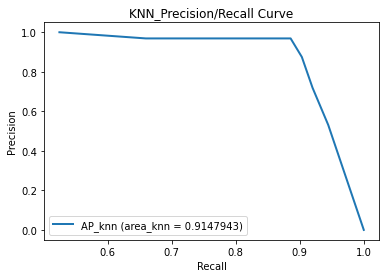

recalls_knn:
[1.      0.96875 0.96875 0.875   0.71875 0.53125 0.     ]
7
precisions_knn:
[0.52459016 0.65957447 0.88571429 0.90322581 0.92       0.94444444
 1.        ]
7
thresholds_knn_pr:
[0.  0.2 0.4 0.6 0.8 1. ]
6


In [72]:
# Draw PR curve and calculate AP value

# Generate Data

# Generate thresholds using encapsulated methods
precisions_knn, recalls_knn, thresholds_knn_pr = precision_recall_curve(y_test, scores_knn_1_1)
#precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Draw chart
# plt.figure("KNN_P-R Curve")

# Set the title of the chart
plt.title('KNN Precision/Recall Curve')

# Set the label of the axis
plt.xlabel('Recall')
plt.ylabel('Precision')

# Calculate AP value
ap_knn = average_precision_score(y_test, scores_knn_1_1, average='weighted', sample_weight=None)
print("ap_knn:")
print(ap_knn) # Area Under Curve
print("==============")

# Display data
plt.plot(precisions_knn, recalls_knn, label='AP_knn (area_knn = {0:.7f})'.format(ap_knn), lw=2)

# Display legend
plt.legend(loc="lower left")

# Display chart
plt.show()

# Generate 6 thresholds
# Generate 7 recall-precision pairs according to thresholds
# Draw the curve according to recalls-precisions pairs
print("recalls_knn:")
print(recalls_knn)
print(len(recalls_knn))
print("==============")

print("precisions_knn:")
print(precisions_knn)
print(len(precisions_knn))
print("==============")

print("thresholds_knn_pr:")
print(thresholds_knn_pr)
print(len(thresholds_knn_pr))

### 4. ROC curve and AUC value

roc_auc_knn:
0.9321120689655173


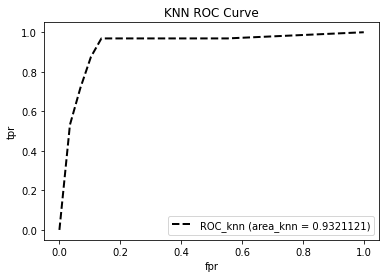

fpr_knn:
[0.         0.03448276 0.06896552 0.10344828 0.13793103 0.55172414
 1.        ]
7
tpr_knn:
[0.      0.53125 0.71875 0.875   0.96875 0.96875 1.     ]
7
thresholds_knn_roc:
[2.  1.  0.8 0.6 0.4 0.2 0. ]
7


In [75]:
# Draw ROC curve and calculate AUC value

# Generate thresholds using encapsulated methods
fpr_knn, tpr_knn, thresholds_knn_roc = roc_curve(y_test, scores_knn_1_1)

# Draw chart

#plt.figure("KNN_ROC Curve")

# Set the title of the chart
plt.title('KNN ROC Curve')

# Set the title of the chart
plt.xlabel('fpr')
plt.ylabel('tpr')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")

# Calculate AUC value
roc_auc_knn = auc(fpr_knn, tpr_knn)
print("roc_auc_knn:")
print(roc_auc_knn) # Area Under Curve
print("==============")

# Display data
plt.plot(fpr_knn, tpr_knn, 'k--', label='ROC_knn (area_knn = {0:.7f})'.format(roc_auc_knn), lw=2) #lw =2 linewidth

# Display legend
plt.legend(loc="lower right")

# Display chart
plt.show()

# Generate 7 thresholds
# Generate 7 fpr-tpr pairs according to thresholds
# Draw the curve according to fpr-tpr pairs
print("fpr_knn:")
print(fpr_knn)
print(len(fpr_knn))
print("==============")
print("tpr_knn:")
print(tpr_knn)
print(len(tpr_knn))
print("==============")
print("thresholds_knn_roc:")
print(thresholds_knn_roc)
print(len(thresholds_knn_roc))

## Algorithm Ⅳ  -- Random Rorest

### 1. Accuracy

In [76]:
# 3 - Random Forest

# instantiating the object
rf = RandomForestClassifier(max_depth=5,n_estimators=100,random_state=5)

# Limit the maximum depth of the tree 
# rf = RandomForestClassifier(max_depth = 5)

# Fitting the object
rf.fit(X_train, y_train)

# # predicting the values
y_pred_rf = rf.predict(X_test)

# accuracy= Number of correctly classified samples (acc_number) / Total number of samples(61)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Output the number of correctly predicted samples
# normalize=False: Predict the correct number of samples
acc_number_rf = accuracy_score(y_test, y_pred_rf, normalize=False)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", acc_rf)

# printing the number of correctly classified samples
print("The test accuracy score of Logistric Regression is ", acc_number_rf)

The test accuracy score of Logistric Regression is  0.8688524590163934
The test accuracy score of Logistric Regression is  53


In [77]:
# confusion matrix

cm_rf_1 = confusion_matrix(y_test, y_pred_rf)
cm_rf_1

array([[27,  2],
       [ 6, 26]], dtype=int64)

In [78]:
# Multiple confusion matrix

cm_rf_2 = multilabel_confusion_matrix(y_test, y_pred_rf)
cm_rf_2

array([[[26,  6],
        [ 2, 27]],

       [[27,  2],
        [ 6, 26]]], dtype=int64)

### 2. Precision, Recall, F1

In [80]:
# Calculate precision, recall, f1

# Precision
precision_score_rf_weighted = precision_score(y_test, y_pred_rf, average='weighted')

# Recall
recall_score_rf_weighted = recall_score(y_test, y_pred_rf, average='weighted')

# F1
f1_score_rf_weighted = f1_score(y_test, y_pred_rf, average='weighted')

print("The precision of RF is ", precision_score(y_test, y_pred_rf, average='weighted'))
# print("The precision of RF is ", precision_score_rf_weighted)
print("==========================")

print("The recall of RF is ", recall_score(y_test, y_pred_rf, average='weighted'))
# print("The recall of RF is ", recall_score_rf_weighted)
print("==========================")

print("The f1 of RF is ", f1_score(y_test, y_pred_rf, average='weighted'))
# print("The f1 of RF is ", f1_score_rf_weighted)

The precision of RF is  0.8760911219927613
The recall of RF is  0.8688524590163934
The f1 of RF is  0.8687114401551207


In [81]:
# Calculate scores

# Probability of prediction input samples belonging to each category
# Probability sum is 1
scores_rf_1 = rf.predict_proba(X_test)
scores_rf_1

array([[0.88277771, 0.11722229],
       [0.51841247, 0.48158753],
       [0.48102685, 0.51897315],
       [0.80469062, 0.19530938],
       [0.28808492, 0.71191508],
       [0.17497515, 0.82502485],
       [0.31335642, 0.68664358],
       [0.93534608, 0.06465392],
       [0.84307996, 0.15692004],
       [0.29613397, 0.70386603],
       [0.4854656 , 0.5145344 ],
       [0.73864761, 0.26135239],
       [0.08834643, 0.91165357],
       [0.87093436, 0.12906564],
       [0.09642344, 0.90357656],
       [0.09974073, 0.90025927],
       [0.03593666, 0.96406334],
       [0.83359076, 0.16640924],
       [0.95214927, 0.04785073],
       [0.78118583, 0.21881417],
       [0.56509845, 0.43490155],
       [0.89646106, 0.10353894],
       [0.51244155, 0.48755845],
       [0.21646087, 0.78353913],
       [0.18896569, 0.81103431],
       [0.36674969, 0.63325031],
       [0.34859651, 0.65140349],
       [0.2027201 , 0.7972799 ],
       [0.83382616, 0.16617384],
       [0.15724054, 0.84275946],
       [0.

In [82]:
# Take the second column of the above matrix (the predicted value is 1)
scores_rf_1_1 = rf.predict_proba(X_test)[:,1]
scores_rf_1_1

array([0.11722229, 0.48158753, 0.51897315, 0.19530938, 0.71191508,
       0.82502485, 0.68664358, 0.06465392, 0.15692004, 0.70386603,
       0.5145344 , 0.26135239, 0.91165357, 0.12906564, 0.90357656,
       0.90025927, 0.96406334, 0.16640924, 0.04785073, 0.21881417,
       0.43490155, 0.10353894, 0.48755845, 0.78353913, 0.81103431,
       0.63325031, 0.65140349, 0.7972799 , 0.16617384, 0.84275946,
       0.08653403, 0.22530995, 0.05842413, 0.39072774, 0.48605443,
       0.25580039, 0.53756148, 0.74621094, 0.3905679 , 0.83029559,
       0.88701071, 0.65410567, 0.67968967, 0.66850757, 0.62377537,
       0.19948967, 0.38204371, 0.90298002, 0.16798653, 0.07750131,
       0.2672658 , 0.30675621, 0.50183018, 0.82626865, 0.31750399,
       0.21407734, 0.25527631, 0.90897104, 0.22681637, 0.02013826,
       0.1384534 ])

### 3. PR curve and AP value

ap_rf:
0.9536463165783018


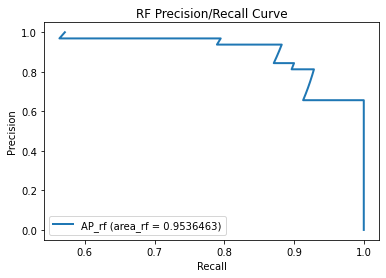

recalls_rf:
[1.      0.96875 0.96875 0.96875 0.96875 0.96875 0.96875 0.96875 0.96875
 0.96875 0.96875 0.96875 0.96875 0.96875 0.96875 0.96875 0.96875 0.96875
 0.9375  0.9375  0.9375  0.9375  0.9375  0.90625 0.875   0.84375 0.84375
 0.8125  0.8125  0.78125 0.75    0.71875 0.6875  0.65625 0.65625 0.65625
 0.625   0.59375 0.5625  0.53125 0.5     0.46875 0.4375  0.40625 0.375
 0.34375 0.3125  0.28125 0.25    0.21875 0.1875  0.15625 0.125   0.09375
 0.0625  0.03125 0.     ]
57
precisions_rf:
[0.57142857 0.56363636 0.57407407 0.58490566 0.59615385 0.60784314
 0.62       0.63265306 0.64583333 0.65957447 0.67391304 0.68888889
 0.70454545 0.72093023 0.73809524 0.75609756 0.775      0.79487179
 0.78947368 0.81081081 0.83333333 0.85714286 0.88235294 0.87878788
 0.875      0.87096774 0.9        0.89655172 0.92857143 0.92592593
 0.92307692 0.92       0.91666667 0.91304348 0.95454545 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        

In [86]:
# Draw PR curve and calculate AP value

# Generate Data

# Generate thresholds using encapsulated methods
precisions_rf, recalls_rf, thresholds_rf_pr = precision_recall_curve(y_test, scores_rf_1_1)

# Draw chart
# plt.figure("RF_P-R Curve")

# Set the title of the chart
plt.title('RF Precision/Recall Curve')

# Set the label of the axis
plt.xlabel('Recall')
plt.ylabel('Precision')


# Calculate AP value
ap_rf = average_precision_score(y_test, scores_rf_1_1, average='weighted', sample_weight=None)
print("ap_rf:")
print(ap_rf) # Area Under Curve
print("==============")

# Display data
plt.plot(precisions_rf, recalls_rf, label='AP_rf (area_rf = {0:.7f})'.format(ap_rf), lw=2)

# Display legend
plt.legend(loc="lower left")

# Display chart
plt.show()

# Generate 56 thresholds
# Generate 57 recall-precision pairs according to thresholds
# Draw the curve according to recalls-precisions pairs
print("recalls_rf:")
print(recalls_rf)
print(len(recalls_rf))
print("==============")

print("precisions_rf:")
print(precisions_rf)
print(len(precisions_rf))
print("==============")

print("thresholds_rf_pr:")
print(thresholds_rf_pr)
print(len(thresholds_rf_pr))

### 4. ROC curve and AUC value

roc_auc_rf:
0.9385775862068965


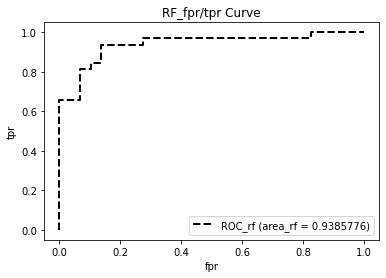

fpr_rf:
[0.         0.         0.         0.06896552 0.06896552 0.10344828
 0.10344828 0.13793103 0.13793103 0.27586207 0.27586207 0.82758621
 0.82758621 1.        ]
14
tpr_rf:
[0.      0.03125 0.65625 0.65625 0.8125  0.8125  0.84375 0.84375 0.9375
 0.9375  0.96875 0.96875 1.      1.     ]
14
thresholds_rf_roc:
[1.96406334 0.96406334 0.65410567 0.63325031 0.50183018 0.48755845
 0.48605443 0.48158753 0.3905679  0.2672658  0.26135239 0.10353894
 0.08653403 0.02013826]
14


In [87]:
# Draw ROC curve and calculate AUC value

# Generate thresholds using encapsulated methods
fpr_rf, tpr_rf, thresholds_rf_roc = roc_curve(y_test, scores_rf_1_1)
#precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Draw chart
# plt.figure("RF_ROC Curve")

# Set the title of the chart
plt.title('RF_fpr/tpr Curve')

# Set the label of the axis
plt.xlabel('fpr')
plt.ylabel('tpr')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")

# Calculate AUC value
roc_auc_rf = auc(fpr_rf, tpr_rf)
print("roc_auc_rf:")
print(roc_auc_rf) # Area Under Curve
print("==============")

# Display data
plt.plot(fpr_rf, tpr_rf, 'k--', label='ROC_rf (area_rf = {0:.7f})'.format(roc_auc_rf), lw=2) #lw =2 linewidth

# Display legend
plt.legend(loc="lower right")

# Display chart
plt.show()

# Generate 14 thresholds
# Generate 14 fpr-tpr pairs according to thresholds
# Draw the curve according to fpr-tpr pairs
print("fpr_rf:")
print(fpr_rf)
print(len(fpr_rf))
print("==============")

print("tpr_rf:")
print(tpr_rf)
print(len(tpr_rf))
print("==============")

print("thresholds_rf_roc:")
print(thresholds_rf_roc)
print(len(thresholds_rf_roc))

## Data collection and comparison

### 1. Accuracy

In [89]:
print("Logistic Regression:")
print("The test accuracy score of Logistric Regression is ", acc_lr)
print("The number of correctly classified samples is ", acc_number_lr)
print("===================================================================")

print("SVM:")
print("The test accuracy score of Logistric Regression is ", acc_svm)
print("The number of correctly classified samples is ", acc_number_svm)
print("===================================================================")

print("KNN:")
print("The test accuracy score of Logistric Regression is ", acc_knn)
print("The number of correctly classified samples is ", acc_number_knn)
print("===================================================================")

print("Random Forest:")
print("The test accuracy score of Logistric Regression is ", acc_rf)
print("The number of correctly classified samples is ", acc_number_rf)
print("===================================================================")

Logistic Regression:
The test accuracy score of Logistric Regression is  0.9016393442622951
The number of correctly classified samples is  55
SVM:
The test accuracy score of Logistric Regression is  0.8852459016393442
The number of correctly classified samples is  54
KNN:
The test accuracy score of Logistric Regression is  0.8852459016393442
The number of correctly classified samples is  54
Random Forest:
The test accuracy score of Logistric Regression is  0.8688524590163934
The number of correctly classified samples is  53


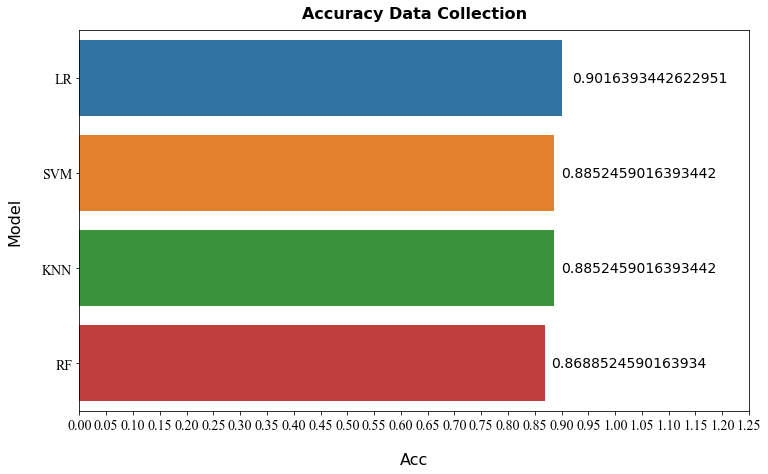

In [166]:
# 1_2 acc 画图集合

models_acc = pd.DataFrame({
    'Model' : ['LR', 
                 'SVM', 
                 'KNN', 
                 'RF'
                ],
    'Acc' : [acc_lr,
               acc_svm,
               acc_knn,
               acc_rf
              ]
})

plt.figure(figsize = (12, 7))
sns.barplot(x = 'Acc', y = 'Model', data = models_acc)

# Set the title of the chart
plt.title('Accuracy Data Collection',fontsize = 16, fontweight = 'bold', alpha = 1, pad = 12)

# Set the label of the axis
plt.xlabel('Acc', fontsize = 16, labelpad=20)
plt.ylabel('Model', fontsize = 16, labelpad=20)

# Set Axis Precision
my_x_ticks = np.arange(0.00, 1.30, 0.05)
plt.xticks(my_x_ticks)

# Set Axis Label Text Size
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.yticks(fontproperties = 'Times New Roman', size = 14)

# Display Data
plt.text(0.92, 0.04, acc_lr, size = 14)
plt.text(0.90, 1.04, acc_svm, size = 14)
plt.text(0.90, 2.04, acc_knn, size = 14)
plt.text(0.88, 3.04, acc_rf, size = 14)

# Display chart
plt.show()

### 2. Confusion matrix

In [100]:
# Single confusion matrix
print("Logistic Regression:")
print("The confusion matrix is \n", cm_lr_1)
print("The number of correctly classified samples is ", acc_number_lr)
print("===================================================================")

print("SVM:")
print("The confusion matrix is \n", cm_svm_1)
print("The number of correctly classified samples is ", acc_number_svm)
print("===================================================================")

print("KNN:")
print("The confusion matrix is \n", cm_knn_1)
print("The number of correctly classified samples is ", acc_number_knn)
print("===================================================================")

print("Random Forest:")
print("The confusion matrix is \n", cm_rf_1)
print("The number of correctly classified samples is ", acc_number_rf)
print("===================================================================")

Logistic Regression:
The confusion matrix is 
 [[27  2]
 [ 4 28]]
The number of correctly classified samples is  55
SVM:
The confusion matrix is 
 [[27  2]
 [ 5 27]]
The number of correctly classified samples is  54
KNN:
The confusion matrix is 
 [[26  3]
 [ 4 28]]
The number of correctly classified samples is  54
Random Forest:
The confusion matrix is 
 [[27  2]
 [ 6 26]]
The number of correctly classified samples is  53


In [104]:
# Multiple confusion matrix
print("Logistic Regression:")
print("The single confusion matrix is \n", cm_lr_1)
print("==========================================")
print("The multiple confusion matrix is \n", cm_lr_2)
print("===================================================================")

print("SVM:")
print("The single confusion matrix is \n", cm_svm_1)
print("==========================================")
print("The multiple confusion matrix is \n", cm_svm_2)
print("===================================================================")

print("KNN:")
print("The single confusion matrix is \n", cm_knn_1)
print("==========================================")
print("The multiple confusion matrix is \n", cm_knn_2)
print("===================================================================")

print("Random Forest:")
print("The single confusion matrix is \n", cm_rf_1)
print("==========================================")
print("The multiple confusion matrix is \n", cm_rf_2)
print("===================================================================")

Logistic Regression:
The single confusion matrix is 
 [[27  2]
 [ 4 28]]
The multiple confusion matrix is 
 [[[28  4]
  [ 2 27]]

 [[27  2]
  [ 4 28]]]
SVM:
The single confusion matrix is 
 [[27  2]
 [ 5 27]]
The multiple confusion matrix is 
 [[[27  5]
  [ 2 27]]

 [[27  2]
  [ 5 27]]]
KNN:
The single confusion matrix is 
 [[26  3]
 [ 4 28]]
The multiple confusion matrix is 
 [[[28  4]
  [ 3 26]]

 [[26  3]
  [ 4 28]]]
Random Forest:
The single confusion matrix is 
 [[27  2]
 [ 6 26]]
The multiple confusion matrix is 
 [[[26  6]
  [ 2 27]]

 [[27  2]
  [ 6 26]]]


### 3. Precision, Recall, F1

In [107]:
print("Logistic Regression:")
print("The precision of LR is ", precision_score_lr_weighted)
print("==========================")
print("The recall of LR is ", recall_score_lr_weighted)
print("==========================")
print("The f1 of LR is ", f1_score_lr_weighted)
print("===================================================================")
print("")
print("SVM:")
print("The precision of SVM is ", precision_score_svm_weighted)
print("==========================")
print("The recall of SVM is ", recall_score_svm_weighted)
print("==========================")
print("The f1 of SVM is ", f1_score_svm_weighted)
print("===================================================================")
print("")
print("KNN:")
print("The precision of KNN is ", precision_score_knn_weighted)
print("==========================")
print("The recall of KNN is ", recall_score_knn_weighted)
print("==========================")
print("The f1 of KNN is ", f1_score_knn_weighted)
print("===================================================================")
print("")
print("Random Forest:")
print("The precision of RF is ", precision_score_rf_weighted)
print("==========================")
print("The recall of RF is ", recall_score_rf_weighted)
print("==========================")
print("The f1 of RF is ", f1_score_rf_weighted)
print("===================================================================")

Logistic Regression:
The precision of LR is  0.9036841177507492
The recall of LR is  0.9016393442622951
The f1 of LR is  0.9016922263352722

SVM:
The precision of SVM is  0.8895385811192763
The recall of SVM is  0.8852459016393442
The f1 of SVM is  0.8852459016393444

KNN:
The precision of KNN is  0.8858452317997532
The recall of KNN is  0.8852459016393442
The f1 of KNN is  0.8853076471859468

Random Forest:
The precision of RF is  0.8760911219927613
The recall of RF is  0.8688524590163934
The f1 of RF is  0.8687114401551207


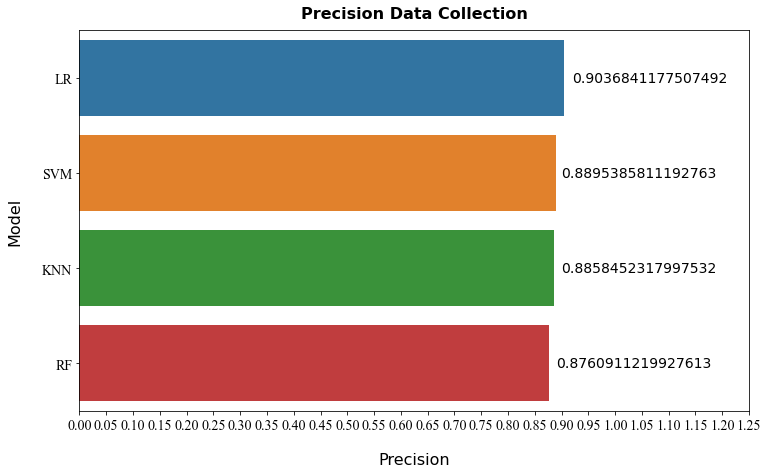

In [165]:
models_precision = pd.DataFrame({
    'Model' : ['LR', 
                 'SVM', 
                 'KNN', 
                 'RF'
                ],
    'Precision' : [precision_score_lr_weighted,
               precision_score_svm_weighted,
               precision_score_knn_weighted,
               precision_score_rf_weighted
              ]
})

plt.figure(figsize = (12, 7))
sns.barplot(x = 'Precision', y = 'Model', data = models_precision)

# Set the title of the chart
plt.title('Precision Data Collection',fontsize = 16, fontweight = 'bold', alpha = 1, pad = 12)

# Set the label of the axis
plt.xlabel('Precision', fontsize = 16, labelpad=20)
plt.ylabel('Model', fontsize = 16, labelpad=20)

# Set Axis Precision
my_x_ticks = np.arange(0.00, 1.30, 0.05)
plt.xticks(my_x_ticks)

# Set Axis Label Text Size
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.yticks(fontproperties = 'Times New Roman', size = 14)

# Display data
plt.text(0.92, 0.04, precision_score_lr_weighted, size = 14)
plt.text(0.90, 1.04, precision_score_svm_weighted, size = 14)
plt.text(0.90, 2.04, precision_score_knn_weighted, size = 14)
plt.text(0.89, 3.04, precision_score_rf_weighted, size = 14)

# Display chart
plt.show()

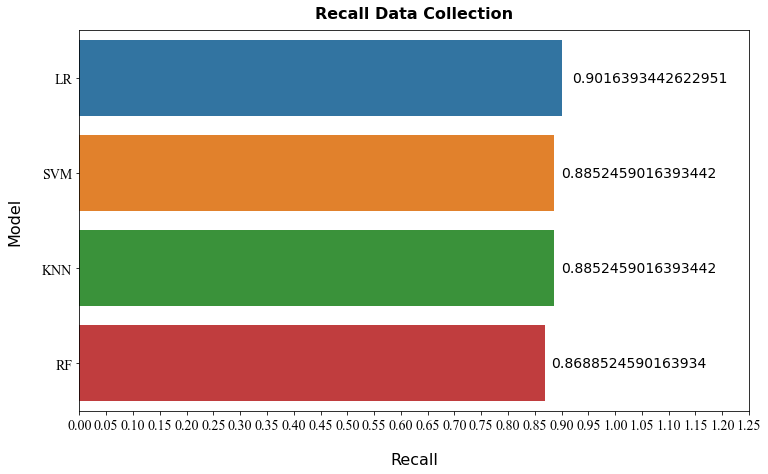

In [164]:
models_recall = pd.DataFrame({
    'Model' : ['LR', 
                 'SVM', 
                 'KNN', 
                 'RF'
                ],
    'Recall' : [recall_score_lr_weighted,
               recall_score_svm_weighted,
               recall_score_knn_weighted,
               recall_score_rf_weighted
              ]
})

plt.figure(figsize = (12, 7))
sns.barplot(x = 'Recall', y = 'Model', data = models_recall)

# Set the title of the chart
plt.title('Recall Data Collection',fontsize = 16, fontweight = 'bold', alpha = 1, pad = 12)

# Set the label of the axis
plt.xlabel('Recall', fontsize = 16, labelpad=20)
plt.ylabel('Model', fontsize = 16, labelpad=20)

# Set Axis Precision
my_x_ticks = np.arange(0.00, 1.30, 0.05)
plt.xticks(my_x_ticks)

# Set Axis Label Text Size
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.yticks(fontproperties = 'Times New Roman', size = 14)

# Display data
plt.text(0.92, 0.04, recall_score_lr_weighted, size = 14)
plt.text(0.90, 1.04, recall_score_svm_weighted, size = 14)
plt.text(0.90, 2.04, recall_score_knn_weighted, size = 14)
plt.text(0.88, 3.04, recall_score_rf_weighted, size = 14)

# Display chart
plt.show()

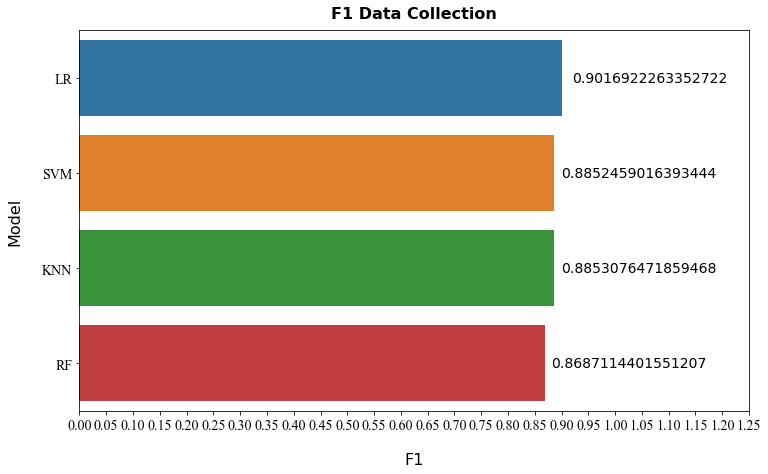

In [163]:
models_f1 = pd.DataFrame({
    'Model' : ['LR', 
                 'SVM', 
                 'KNN', 
                 'RF'
                ],
    'F1' : [f1_score_lr_weighted,
               f1_score_svm_weighted,
               f1_score_knn_weighted,
               f1_score_rf_weighted
              ]
})

plt.figure(figsize = (12, 7))
sns.barplot(x = 'F1', y = 'Model', data = models_f1)

# Set the title of the chart
plt.title('F1 Data Collection',fontsize = 16, fontweight = 'bold', alpha = 1, pad = 12)

# Set the label of the axis
plt.xlabel('F1', fontsize = 16, labelpad=20)
plt.ylabel('Model', fontsize = 16, labelpad=20)

# Set Axis Precision
my_x_ticks = np.arange(0.00, 1.30, 0.05)
plt.xticks(my_x_ticks)

# Set Axis Label Text Size
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.yticks(fontproperties = 'Times New Roman', size = 14)

# Display data
plt.text(0.92, 0.04, f1_score_lr_weighted, size = 14)
plt.text(0.90, 1.04, f1_score_svm_weighted, size = 14)
plt.text(0.90, 2.04, f1_score_knn_weighted, size = 14)
plt.text(0.88, 3.04, f1_score_rf_weighted, size = 14)

# Display chart
plt.show()

### 4. Probability distribution of results

In [125]:
# scores1
print("Logistic Regression:")
print("The predicted probability distribution is \n", scores_lr_1)
print("===================================================================")

print("SVM:")
print("The predicted probability distribution is \n", scores_svm_1)
print("===================================================================")

print("KNN:")
print("The predicted probability distribution is \n", scores_knn_1)
print("===================================================================")

print("Random Forest:")
print("The predicted probability distribution is \n", scores_rf_1)
print("===================================================================")

Logistic Regression:
The predicted probability distribution is 
 [[0.97648128 0.02351872]
 [0.53306119 0.46693881]
 [0.35084894 0.64915106]
 [0.97677912 0.02322088]
 [0.06736384 0.93263616]
 [0.07824614 0.92175386]
 [0.35179804 0.64820196]
 [0.99454676 0.00545324]
 [0.98758655 0.01241345]
 [0.42552968 0.57447032]
 [0.47085575 0.52914425]
 [0.8954639  0.1045361 ]
 [0.07579818 0.92420182]
 [0.94804642 0.05195358]
 [0.01478362 0.98521638]
 [0.0486547  0.9513453 ]
 [0.02156507 0.97843493]
 [0.95928012 0.04071988]
 [0.99256059 0.00743941]
 [0.98612054 0.01387946]
 [0.56087972 0.43912028]
 [0.92970746 0.07029254]
 [0.64769459 0.35230541]
 [0.24408553 0.75591447]
 [0.17248489 0.82751511]
 [0.36672646 0.63327354]
 [0.12799731 0.87200269]
 [0.29024373 0.70975627]
 [0.94381943 0.05618057]
 [0.04829158 0.95170842]
 [0.97562557 0.02437443]
 [0.97341076 0.02658924]
 [0.99080268 0.00919732]
 [0.83179781 0.16820219]
 [0.16310977 0.83689023]
 [0.96248625 0.03751375]
 [0.25304087 0.74695913]
 [0.122265

In [126]:
# scores1-1
print("Logistic Regression:")
print("The probability that the prediction result equal 1 is \n", scores_lr_1_1)
print("===================================================================")

print("SVM:")
print("The probability that the prediction result equal 1 is \n", scores_lr_1_1)
print("===================================================================")

print("KNN:")
print("The probability that the prediction result equal 1 is \n", scores_lr_1_1)
print("===================================================================")

print("Random Forest:")
print("The probability that the prediction result equal 1 is \n", scores_lr_1_1)
print("===================================================================")

Logistic Regression:
The probability that the prediction result equal 1 is 
 [0.02351872 0.46693881 0.64915106 0.02322088 0.93263616 0.92175386
 0.64820196 0.00545324 0.01241345 0.57447032 0.52914425 0.1045361
 0.92420182 0.05195358 0.98521638 0.9513453  0.97843493 0.04071988
 0.00743941 0.01387946 0.43912028 0.07029254 0.35230541 0.75591447
 0.82751511 0.63327354 0.87200269 0.70975627 0.05618057 0.95170842
 0.02437443 0.02658924 0.00919732 0.16820219 0.83689023 0.03751375
 0.74695913 0.87773467 0.62376051 0.88897951 0.92699675 0.8301018
 0.90465742 0.71941297 0.80216151 0.08273072 0.37514961 0.96050798
 0.03525413 0.01205127 0.09033716 0.05443552 0.63386224 0.95593516
 0.20075271 0.02558864 0.19024589 0.96709863 0.01870597 0.00458341
 0.05301163]
SVM:
The probability that the prediction result equal 1 is 
 [0.02351872 0.46693881 0.64915106 0.02322088 0.93263616 0.92175386
 0.64820196 0.00545324 0.01241345 0.57447032 0.52914425 0.1045361
 0.92420182 0.05195358 0.98521638 0.9513453  0.9

In [124]:
# scores2
# print("Logistic Regression:")
# print("The Distribution of forecast results is \n", scores_lr_2)
# print("===================================================================")

# print("SVM:")
# print("The Distribution of forecast results is \n", scores_lr_2)
# print("===================================================================")

# print("KNN:")
# print("The Distribution of forecast results is \n", scores_lr_2)
# print("===================================================================")

# print("Random Forest:")
# print("The Distribution of forecast results is \n", scores_lr_2)
# print("===================================================================")

### 5. PR curve and AP value

In [127]:
# Thresholds of PR Curve
print("Logistic Regression:")
print("Thresholds of PR Curve: \n", thresholds_lr_pr)
print("===================================================================")

print("SVM:")
print("Thresholds of PR Curve: \n", thresholds_svm_pr)
print("===================================================================")

print("KNN:")
print("Thresholds of PR Curve: \n", thresholds_knn_pr)
print("===================================================================")

print("Random Forest:")
print("Thresholds of PR Curve: \n", thresholds_rf_pr)
print("===================================================================")

Logistic Regression:
Thresholds of PR Curve: 
 [0.02437443 0.02558864 0.02658924 0.03525413 0.03751375 0.04071988
 0.05195358 0.05301163 0.05443552 0.05618057 0.07029254 0.08273072
 0.09033716 0.1045361  0.16820219 0.19024589 0.20075271 0.35230541
 0.37514961 0.43912028 0.46693881 0.52914425 0.57447032 0.62376051
 0.63327354 0.63386224 0.64820196 0.64915106 0.70975627 0.71941297
 0.74695913 0.75591447 0.80216151 0.82751511 0.8301018  0.83689023
 0.87200269 0.87773467 0.88897951 0.90465742 0.92175386 0.92420182
 0.92699675 0.93263616 0.9513453  0.95170842 0.95593516 0.96050798
 0.96709863 0.97843493 0.98521638]
SVM:
Thresholds of PR Curve: 
 [0.05771808 0.06039071 0.06118444 0.07298319 0.07740932 0.08706272
 0.09344969 0.09583111 0.10244389 0.14437309 0.14662556 0.19208191
 0.19642191 0.21207809 0.21405626 0.23674205 0.2575164  0.26476973
 0.27300413 0.30026942 0.33674223 0.344099   0.37730346 0.41303713
 0.47340745 0.51874472 0.52046663 0.5419178  0.55167487 0.5522225
 0.62339826 0.700

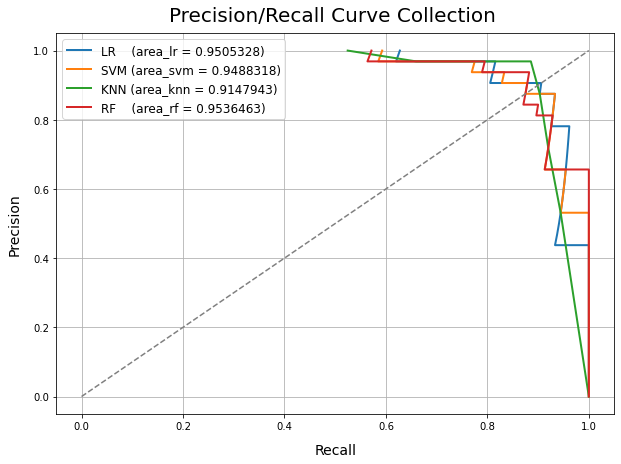

In [130]:
fig1,ax1 = plt.subplots(figsize=(10,7))

#ax1.figure("Collection P-R Curve")
ax1.set_title('Precision/Recall Curve Collection ', fontsize=20, pad = 12)
ax1.set_xlabel('Recall', fontsize=14, labelpad=12)
ax1.set_ylabel('Precision', fontsize=14, labelpad=12)

# Manually define label names label=''
ax1.plot(precisions_lr, recalls_lr, label='LR    (area_lr = {0:.7f})'.format(ap_lr), lw=2)
ax1.plot(precisions_svm, recalls_svm, label='SVM (area_svm = {0:.7f})'.format(ap_svm), lw=2)
ax1.plot(precisions_knn, recalls_knn, label='KNN (area_knn = {0:.7f})'.format(ap_knn), lw=2)
ax1.plot(precisions_rf, recalls_rf, label='RF    (area_rf = {0:.7f})'.format(ap_rf), lw=2)

plt.legend(loc="upper left", fontsize=12)

# Set background gridlines
plt.grid(True)

# Draw Diagonal
ax1.plot([0,1],[0,1],linestyle='--',color='grey')

In [133]:
# AP Collection
print("Logistic Regression:")
print("The AP of LR is \n", ap_lr)
print("===================================================================")
print("")

print("SVM:")
print("The AP of SVM is \n", ap_svm)
print("===================================================================")
print("")

print("KNN:")
print("The AP of KNN is \n", ap_knn)
print("===================================================================")
print("")

print("Random Forest:")
print("The AP of LR RF \n", ap_rf)
print("===================================================================")

Logistic Regression:
The AP of LR is 
 0.9505328058301409

SVM:
The AP of SVM is 
 0.9488317935320545

KNN:
The AP of KNN is 
 0.9147943002778407

Random Forest:
The AP of LR RF 
 0.9536463165783018


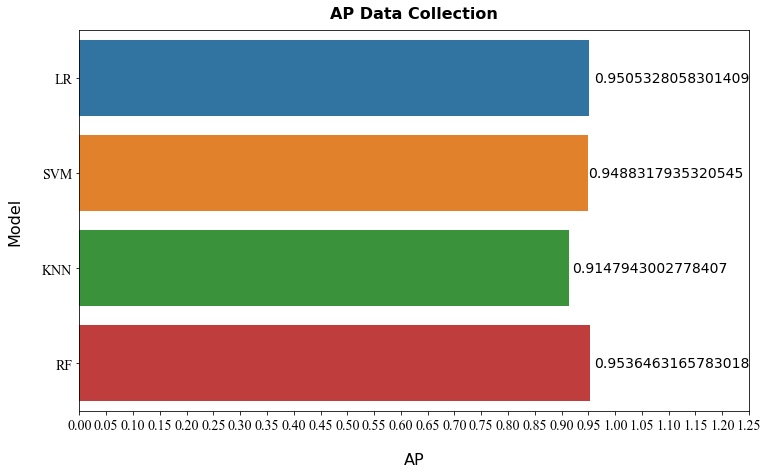

In [162]:
models_pr_ap = pd.DataFrame({
    'Model' : ['LR', 
                 'SVM', 
                 'KNN', 
                 'RF'
                ],
    'AP' : [ap_lr,
               ap_svm,
               ap_knn,
               ap_rf
              ]
})

plt.figure(figsize = (12, 7))
sns.barplot(x = 'AP', y = 'Model', data = models_pr_ap)

# Set the title of the chart
plt.title('AP Data Collection',fontsize = 16, fontweight = 'bold', alpha = 1, pad = 12)

# Set the label of the axis
plt.xlabel('AP', fontsize = 16, labelpad=20)
plt.ylabel('Model', fontsize = 16, labelpad=20)

# Set Axis Precision
my_x_ticks = np.arange(0.00, 1.30, 0.05)
plt.xticks(my_x_ticks)

# Set Axis Label Text Size
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.yticks(fontproperties = 'Times New Roman', size = 14)

# Display data
plt.text(0.96, 0.04, ap_lr, size = 14)
plt.text(0.95, 1.04, ap_svm, size = 14)
plt.text(0.92, 2.04, ap_knn, size = 14)
plt.text(0.96, 3.04, ap_rf, size = 14)

# Display chart
plt.show()

### 6. ROC curve and AUC value

In [139]:
# Thresholds of ROC Curve
print("Logistic Regression:")
print("Thresholds of ROC Curve: \n", thresholds_lr_roc)
print("===================================================================")

print("SVM:")
print("Thresholds of ROC Curve: \n", thresholds_svm_roc)
print("===================================================================")

print("KNN:")
print("Thresholds of ROC Curve: \n", thresholds_knn_roc)
print("===================================================================")

print("Random Forest:")
print("Thresholds of ROC Curve: \n", thresholds_rf_roc)
print("===================================================================")

Logistic Regression:
Thresholds of ROC Curve: 
 [1.98521638 0.98521638 0.87773467 0.87200269 0.63386224 0.63327354
 0.52914425 0.46693881 0.43912028 0.19024589 0.1045361  0.02558864
 0.02437443 0.00458341]
SVM:
Thresholds of ROC Curve: 
 [1.9548044  0.9548044  0.81980398 0.81701839 0.70030377 0.70013293
 0.47340745 0.37730346 0.344099   0.30026942 0.27300413 0.23674205
 0.21405626 0.06039071 0.05771808 0.01299212]
KNN:
Thresholds of ROC Curve: 
 [2.  1.  0.8 0.6 0.4 0.2 0. ]
Random Forest:
Thresholds of ROC Curve: 
 [1.96406334 0.96406334 0.65410567 0.63325031 0.50183018 0.48755845
 0.48605443 0.48158753 0.3905679  0.2672658  0.26135239 0.10353894
 0.08653403 0.02013826]


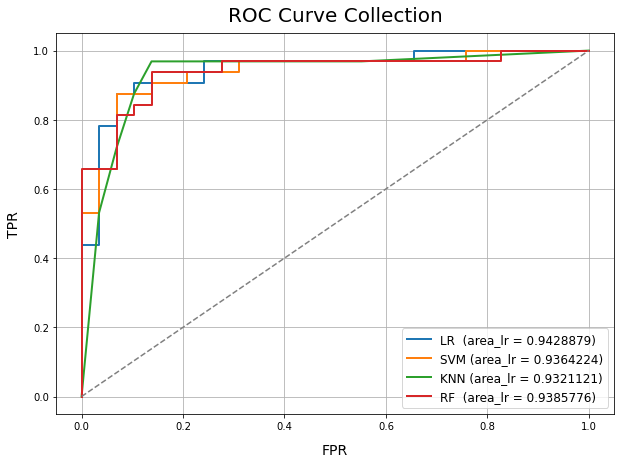

In [142]:
fig2,ax2 = plt.subplots(figsize=(10,7))

ax2.set_title('ROC Curve Collection', fontsize=20 ,pad = 12)
# ax2.set_xlabel('False Positive Rate')
# ax2.set_ylabel('True Positive Rate')
ax2.set_xlabel('FPR',fontsize=14, labelpad=12)
ax2.set_ylabel('TPR',fontsize=14, labelpad=12)

# Manually define label names label=''
ax2.plot(fpr_lr, tpr_lr,   label='LR  (area_lr = {0:.7f})'.format(roc_auc_lr), lw=2)
ax2.plot(fpr_svm, tpr_svm, label='SVM (area_lr = {0:.7f})'.format(roc_auc_svm), lw=2)
ax2.plot(fpr_knn, tpr_knn, label='KNN (area_lr = {0:.7f})'.format(roc_auc_knn), lw=2)
ax2.plot(fpr_rf, tpr_rf,   label='RF  (area_lr = {0:.7f})'.format(roc_auc_rf), lw=2)

plt.legend(loc="lower right", fontsize=12)

# Set background gridlines
plt.grid(True)

# Draw Diagonal
ax2.plot([0,1],[0,1],linestyle='--',color='grey')

In [145]:
# AUC Collection
print("Logistic Regression:")
print("The AUC of LR is \n", roc_auc_lr)
print("===================================================================")

print("SVM:")
print("The AUC of SVM is \n", roc_auc_svm)
print("===================================================================")

print("KNN:")
print("The AUC of KNN is \n", roc_auc_knn)
print("===================================================================")

print("Random Forest:")
print("The AUC of RF is \n", roc_auc_rf)
print("===================================================================")

Logistic Regression:
The AUC of LR is 
 0.9428879310344827
SVM:
The AUC of SVM is 
 0.9364224137931034
KNN:
The AUC of KNN is 
 0.9321120689655173
Random Forest:
The AUC of RF is 
 0.9385775862068965


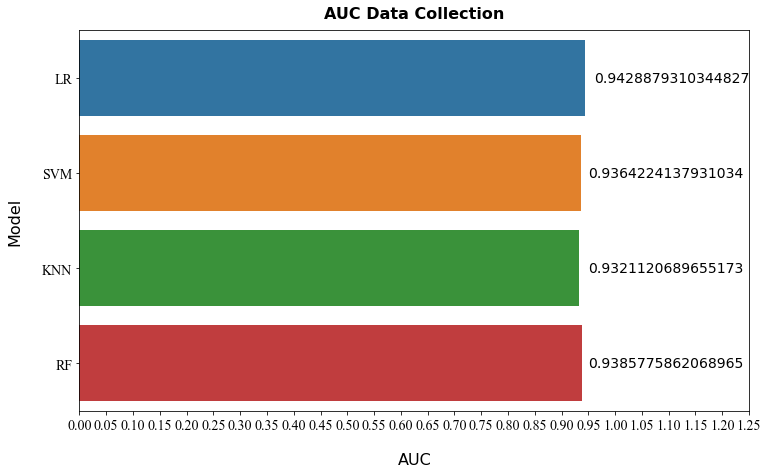

In [159]:
models_roc_auc = pd.DataFrame({
    'Model' : ['LR', 
                 'SVM', 
                 'KNN', 
                 'RF'
                ],
    'AUC' : [roc_auc_lr,
               roc_auc_svm,
               roc_auc_knn,
               roc_auc_rf
              ]
})

plt.figure(figsize = (12, 7))
sns.barplot(x = 'AUC', y = 'Model', data = models_roc_auc)

# Set the title of the chart
plt.title('AUC Data Collection',fontsize = 16, fontweight = 'bold', alpha = 1, pad = 12)

# Set the label of the axis
plt.xlabel('AUC', fontsize = 16, labelpad=20)
plt.ylabel('Model', fontsize = 16, labelpad=20)

# Set Axis Precision
my_x_ticks = np.arange(0.00, 1.30, 0.05)
plt.xticks(my_x_ticks)

# Set Axis Label Text Size
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.yticks(fontproperties = 'Times New Roman', size = 14)

# Display data
plt.text(0.96, 0.04, roc_auc_lr, size = 14)
plt.text(0.95, 1.04, roc_auc_svm, size = 14)
plt.text(0.95, 2.04, roc_auc_knn, size = 14)
plt.text(0.95, 3.04, roc_auc_rf, size = 14)

# Display chart
plt.show()

## Compare all algorithms

### 1. accuracy


In [154]:
acc_tensor = 0.8852459192276001

In [155]:
print("Logistic Regression:")
print("The test accuracy score of Logistric Regression is ", acc_lr)
print("===================================================================")
print("")

print("SVM:")
print("The test accuracy score of Logistric Regression is ", acc_svm)
print("===================================================================")
print("")

print("KNN:")
print("The test accuracy score of Logistric Regression is ", acc_knn)
print("===================================================================")
print("")

print("Random Forest:")
print("The test accuracy score of Logistric Regression is ", acc_rf)
print("===================================================================")
print("")

print("Tensorflow:")
print("The test accuracy score of Tensorflow           is ", acc_tensor)
print("===================================================================")

Logistic Regression:
The test accuracy score of Logistric Regression is  0.9016393442622951

SVM:
The test accuracy score of Logistric Regression is  0.8852459016393442

KNN:
The test accuracy score of Logistric Regression is  0.8852459016393442

Random Forest:
The test accuracy score of Logistric Regression is  0.8688524590163934

Tensorflow:
The test accuracy score of Tensorflow           is  0.8852459192276001


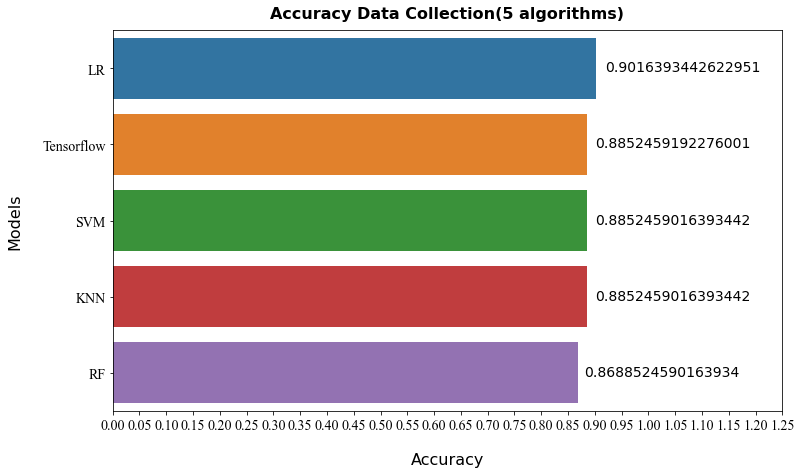

In [160]:
models_acc = pd.DataFrame({
    'Model' : [  
                 'LR', 
                 'Tensorflow',
                 'SVM', 
                 'KNN', 
                 'RF'
                 
                ],
    'Acc' : [
               acc_lr,
               acc_tensor,
               acc_svm,
               acc_knn,
               acc_rf
              ]
})

plt.figure(figsize = (12, 7))
sns.barplot(x = 'Acc', y = 'Model', data = models_acc)

# Set the title of the chart
plt.title('Accuracy Data Collection(5 algorithms)',fontsize = 16, fontweight = 'bold', alpha = 1, pad = 12)

# Set the label of the axis
plt.xlabel('Accuracy', fontsize = 16, labelpad=20)
plt.ylabel('Models', fontsize = 16, labelpad=20)

# Set Axis Precision
my_x_ticks = np.arange(0.00, 1.30, 0.05)
plt.xticks(my_x_ticks)

# Set Axis Label Text Size
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.yticks(fontproperties = 'Times New Roman', size = 14)

# Display data
plt.text(0.92, 0.04, acc_lr, size = 14)
plt.text(0.90, 1.04, acc_tensor, size = 14)
plt.text(0.90, 2.04, acc_svm, size = 14)
plt.text(0.90, 3.04, acc_knn, size = 14)
plt.text(0.88, 4.04, acc_rf, size = 14)

# Display chart
plt.show()

### Conclusion: Select logistic regression as the final algorithm